# Analyzing Marketing Campaigns with pandas ①
> [Analyzing Marketing Campaigns with pandas - ①Pandas](https://learn.datacamp.com/courses/analyzing-marketing-campaigns-with-pandas) まとめ, via Datacamp

- toc: true
- badges: false
- comments: true
- author: Jay Sung
- categories: [Datacamp]
- image: images/cam.png

- - -

## マーケティングチームでデータサイエンティストがやること

- マーケッティングキャンペーンの効果分析 & ターゲッティング
- マーケッティングチャネルの転換率や収益を考慮し、妥当性を分析
- A/B テストを行う

- - -

In [32]:
#
# import data

import pandas as pd

marketing = pd.read_csv('./dataset/marketing.csv')

## データを確認

In [7]:
marketing.head()

,user_id,date_served,marketing_channel,variant,converted,language_displayed,language_preferred,age_group,date_subscribed,date_canceled,subscribing_channel,is_retained
0,a100000029,1/1/18,House Ads,personalization,True,English,English,0-18 years,1/1/18,NaN,House Ads,True
1,a100000030,1/1/18,House Ads,personalization,True,English,English,19-24 years,1/1/18,NaN,House Ads,True
2,a100000031,1/1/18,House Ads,personalization,True,English,English,24-30 years,1/1/18,NaN,House Ads,True
3,a100000032,1/1/18,House Ads,personalization,True,English,English,30-36 years,1/1/18,NaN,House Ads,True
4,a100000033,1/1/18,House Ads,personalization,True,English,English,36-45 years,1/1/18,NaN,House Ads,True


In [4]:
marketing.describe()

,user_id,date_served,marketing_channel,variant,converted,language_displayed,language_preferred,age_group,date_subscribed,date_canceled,subscribing_channel,is_retained
count,10037,10021,10022,10037,10022,10037,10037,10037,1856,577,1856,1856
unique,7309,31,5,2,2,4,4,7,31,115,5,2
top,a100000882,1/15/18,House Ads,control,False,English,English,19-24 years,1/16/18,4/2/18,Instagram,True
freq,12,789,4733,5091,8946,9793,9275,1682,163,15,600,1279


In [5]:
marketing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10037 entries, 0 to 10036
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   user_id              10037 non-null  object
 1   date_served          10021 non-null  object
 2   marketing_channel    10022 non-null  object
 3   variant              10037 non-null  object
 4   converted            10022 non-null  object
 5   language_displayed   10037 non-null  object
 6   language_preferred   10037 non-null  object
 7   age_group            10037 non-null  object
 8   date_subscribed      1856 non-null   object
 9   date_canceled        577 non-null    object
 10  subscribing_channel  1856 non-null   object
 11  is_retained          1856 non-null   object
dtypes: object(12)
memory usage: 941.1+ KB


## 列ごとにデータ型を更新する

### データ型の変換

In [33]:
#
# Check the data type

print(marketing['is_retained'].dtype)

object


In [34]:
#
# Convert is_retained to a boolean
marketing['is_retained'] = marketing['is_retained'].astype('bool')

# Check the data type of is_retained, again
print(marketing['is_retained'].dtype)

bool


### 新しい列の追加

In [12]:
#
# Mapping for channels
channel_dict = {"House Ads": 1, "Instagram": 2, 
                "Facebook": 3, "Email": 4, "Push": 5}

# チャネルをコードにMappingする
marketing['channel_code'] = marketing['subscribing_channel'].map(channel_dict)

In [25]:
#
# 結果
marketing[['subscribing_channel', 'channel_code']]

,subscribing_channel,channel_code
0,House Ads,1.0
1,House Ads,1.0
2,House Ads,1.0
3,House Ads,1.0
4,House Ads,1.0
...,...,...
10032,Email,4.0
10033,Email,4.0
10034,Email,4.0
10035,Email,4.0


In [26]:
import numpy as np

# 列同士の一致有無を表す列を追加
marketing['is_correct_lang'] = np.where(
    marketing['language_preferred'] == marketing['language_displayed'], 
    'Yes', 
    'No'
)

# 結果
marketing[['language_preferred', 'language_displayed', 'is_correct_lang']]

,language_preferred,language_displayed,is_correct_lang
0,English,English,Yes
1,English,English,Yes
2,English,English,Yes
3,English,English,Yes
4,English,English,Yes
...,...,...,...
10032,German,German,Yes
10033,German,German,Yes
10034,German,German,Yes
10035,German,German,Yes


In [28]:
#
# インポートの時にdatatime型にすることも可能
# marketing = pd.read_csv('./dataset/marketing.csv', 
#                    parse_dates = ['date_served', 'date_subscribed', 'date_canceled'])

# 曜日の列を数字で表した列追加
# 月曜日:0, ... ,日曜日:6
marketing_with_date['DoW'] = marketing_with_date['date_subscribed'].dt.dayofweek

#結果
marketing_with_date[['date_subscribed', 'DoW']]

,date_subscribed,DoW
0,2018-01-01,0.0
1,2018-01-01,0.0
2,2018-01-01,0.0
3,2018-01-01,0.0
4,2018-01-01,0.0
...,...,...
10032,2018-01-17,2.0
10033,2018-01-17,2.0
10034,2018-01-17,2.0
10035,2018-01-17,2.0


## 探索的データ解析（EDA）

In [29]:
#
# date_served列をグループ化し、項目ごとにユニークなIDを数える
daily_users = marketing.groupby(['date_served'])['user_id'].nunique()

# print head
print(daily_users.head())

date_served
1/1/18     362
1/10/18    337
1/11/18    310
1/12/18    301
1/13/18    306
Name: user_id, dtype: int64


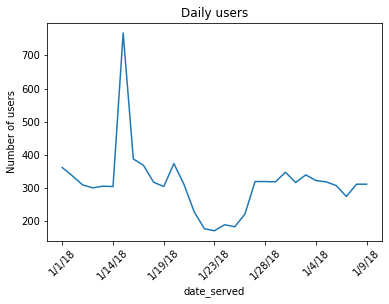

In [31]:
import matplotlib.pyplot as plt

# Plot daily_subscribers
daily_users.plot()

# Include a title and y-axis label
plt.title('Daily users')
plt.ylabel('Number of users')

# Rotate the x-axis labels by 45 degrees
plt.xticks(rotation = 45)

# Display the plot
plt.show()

- - -
**このシリーズの別のポストを見るには**

　　　[[Next >>]](https://jaysung00.github.io/jays_blog/datacamp/2021/02/02/Marketing-2.html)